In [1]:
#! swig -c++ -python swig/ising.i
#! python swig/setup_ising.py build_ext --inplace

In [1]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt
from DataReader import DataReader as dr

In [2]:
output = dr.getRehnquist()

Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994053
Current case ID:  1994054
All votes:  [None None None None None None None None None]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (9,)
Case votes shape:  (9,)
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994054
Current case ID:  1994055
All votes:  [[None None None None None None None None None]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (2, 9)
Case votes shape:  (9,)
Current case ID:  1994055
Current case ID:  1994055
Current case ID:  1994055
Current case ID:  1994055
Current case ID:  1994055
Current case ID:  1994055
Current cas

Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995017
Current case ID:  1995018
All votes:  [[None None None None None None None None None]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [-1.0 1.0 -1.0 1.0 1.0 -1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0]
 [-1.0 1.0 -1.0 -1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [-1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0]
 [1.0 -1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0]
 [1.0 

Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995056
Current case ID:  1995057
All votes:  [[None None None None None None None None None]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [-1.0 1.0 -1.0 1.0 1.0 -1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0]
 [-1.0 1.0 -1.0 -1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [-1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 -1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0]
 [1.0 -1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0]
 [1.0 

Current case ID:  1995075
Current case ID:  1995075
Current case ID:  1995075
Current case ID:  1995075
Current case ID:  1995076
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1. -1.  1. -1. -1.]
All votes shape:  (115, 9)
Case votes shape:  (9,)
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995076
Current case ID:  1995077
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1. -1.]
All votes shape:  (116, 9)
Case votes shape:  (9,)
C

Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996011
Current case ID:  1996012
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 -1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 1.0 ... -1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (142, 9)
Case votes shape:  (9,)
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996012
Current case ID:  1996013
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 -1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:

Current case ID:  1996041
Current case ID:  1996041
Current case ID:  1996041
Current case ID:  1996041
Current case ID:  1996041
Current case ID:  1996041
Current case ID:  1996042
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 -1.0 ... -1.0 -1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (171, 9)
Case votes shape:  (9,)
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996042
Current case ID:  1996043
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 -1.0 ... -1.0 -1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (172,

Current case ID:  1996062
Current case ID:  1996062
Current case ID:  1996062
Current case ID:  1996062
Current case ID:  1996062
Current case ID:  1996062
Current case ID:  1996063
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]]
Case votes:  [ 1. -1.  1.  1.  1. -1.  1. -1. -1.]
All votes shape:  (192, 9)
Case votes shape:  (9,)
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996063
Current case ID:  1996064
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]]
Case votes:  [ 1.  1.  1. -1.  1.  1. -1.  1.  1.]
Al

Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (221, 9)
Case votes shape:  (9,)
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996092
Current case ID:  1996093
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 0.0 ... 1.0 1.0 -1.0]
 [-1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (222, 9)
Case votes shape:  (9,)
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996093
Current case ID:  1996094
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [-1.0 1.0 1.0 .

Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1. -1.]
All votes shape:  (249, 9)
Case votes shape:  (9,)
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997025
Current case ID:  1997026
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 1.0 -1.0]]
Case votes:  [-1.  1.  1. -1.  1.  1. -1.  1.  1.]
All votes shape:  (250, 9)
Case votes shape:  (9,)
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997026
Current case ID:  1997027
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 .

Current case ID:  1997055
Current case ID:  1997055
Current case ID:  1997055
Current case ID:  1997056
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [ 1.  1.  1.  1.  1. -1.  1. -1. -1.]
All votes shape:  (280, 9)
Case votes shape:  (9,)
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997056
Current case ID:  1997057
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 -1.0 -1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (281, 9)
Case votes shape:  (9,)
Current case ID:  1997057
Current case ID: 

Current case ID:  1997082
Current case ID:  1997082
Current case ID:  1997083
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [-1.0 1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (307, 9)
Case votes shape:  (9,)
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997083
Current case ID:  1997084
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [-1.0 1.0 1.0 ... 1.0 -1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1. -1.  1. -1. -1.]
All votes shape:  (308, 9)
Case votes shape:  (9,)
Current case ID:  1997084
Current case ID:  1997084
Current case ID: 

Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998009
Current case ID:  1998010
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1. -1.  1. -1. -1.]
All votes shape:  (338, 9)
Case votes shape:  (9,)
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998010
Current case ID:  1998011
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]]
Case vo

Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998036
Current case ID:  1998037
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (365, 9)
Case votes shape:  (9,)
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998037
Current case ID:  1998038
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.

Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998067
Current case ID:  1998068
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 -1.0 ... 1.0 -1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]]
Case votes:  [ 1.  1.  1.  1.  1.  1.  1. -1.  0.]
All votes shape:  (396, 9)
Case votes shape:  (9,)
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998068
Current case ID:  1998069
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 -1.0 ... 1.0 -1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 ... 1.0 -1.0 0.0]

Case votes:  [ 1.  1.  1. -1.  1.  1. -1.  1.  1.]
All votes shape:  (422, 9)
Case votes shape:  (9,)
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999002
Current case ID:  1999003
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1.]
All votes shape:  (423, 9)
Case votes shape:  (9,)
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999003
Current case ID:  1999004
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ..

Case votes:  [ 1.  1.  1.  1.  1. -1.  1. -1.  1.]
All votes shape:  (454, 9)
Case votes shape:  (9,)
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999037
Current case ID:  1999038
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... -1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (455, 9)
Case votes shape:  (9,)
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999038
Current case ID:  1999039
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.

Current case ID:  1999063
Current case ID:  1999063
Current case ID:  1999063
Current case ID:  1999064
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]]
Case votes:  [-1.  1. -1. -1.  1.  1.  1.  1. -1.]
All votes shape:  (480, 9)
Case votes shape:  (9,)
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999064
Current case ID:  1999065
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 -1.0 1.0 ... 1.0 -1.0 -1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]]
Case votes:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
All votes shape:  (481, 9)
Case votes shape:  (9,)
Current case ID:  1999065
Current case

 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (125,)
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000009
Current case ID:  2000010
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0

 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.

 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.

Current case ID:  2000051
Current case ID:  2000051
Current case ID:  2000051
Current case ID:  2000051
Current case ID:  2000052
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -

Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -

Case votes shape:  (790,)
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000083
Current case ID:  2000084
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.


  1.  1.  1.  1.  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (853,)
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001003
Current case ID:  2001004
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.

Case votes:  [ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -

Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001022
Current case ID:  2001023
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1. -1.]
All votes shape:  (501, 9)
Case votes shape:  (1033,)
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001023
Current case ID:  2001024
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Cas

Current case ID:  2001061
Current case ID:  2001061
Current case ID:  2001062
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (1375,)
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001062
Current case ID:  2001063
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (1384,)
Current case ID:  2001063
Current case ID:  2001063
Current ca

Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002005
Current case ID:  2002006
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (1645,)
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002006
Current case ID:  2002007
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Cas

Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002033
Current case ID:  2002034
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (1897,)
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002034
Current case ID:  2002035
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...

Current case ID:  2002061
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (2140,)
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002061
Current case ID:  2002062
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ... -1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (2149,)
Current case ID:  2002062
Current case ID:  2002062
Current case ID:  2002062
Current case ID:  2002062
Current ca

Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003003
Current case ID:  2003004
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (2383,)
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003004
Current case ID:  2003005
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Cas

Current case ID:  2003038
Current case ID:  2003038
Current case ID:  2003038
Current case ID:  2003038
Current case ID:  2003038
Current case ID:  2003038
Current case ID:  2003039
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (2587,)
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003039
Current case ID:  2003040
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes sh

Case votes:  [ 1. -1.  1. ...  1. -1. -1.]
All votes shape:  (501, 9)
Case votes shape:  (2821,)
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003065
Current case ID:  2003066
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ... -1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (2830,)
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003066
Current case ID:  2003067
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 

Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003089
Current case ID:  2003090
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1. -1. -1.]
All votes shape:  (501, 9)
Case votes shape:  (3044,)
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003090
Current case ID:  2003091
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Cas

Current case ID:  2004024
Current case ID:  2004024
Current case ID:  2004024
Current case ID:  2004024
Current case ID:  2004024
Current case ID:  2004025
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ... -1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (3278,)
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004025
Current case ID:  2004026
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes 

Current case ID:  2004050
Current case ID:  2004050
Current case ID:  2004051
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1. -1.]
All votes shape:  (501, 9)
Case votes shape:  (3512,)
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004051
Current case ID:  2004052
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (3521,)
Current case ID:  2004052
Current case ID:  2004052
Current ca

Current case ID:  2004077
Current case ID:  2004077
Current case ID:  2004077
Current case ID:  2004077
Current case ID:  2004078
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ...  1. -1. -1.]
All votes shape:  (501, 9)
Case votes shape:  (3755,)
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004078
Current case ID:  2004079
All votes:  [[None None None ... None None None]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]
Case votes:  [ 1. -1.  1. ... -1.  1.  1.]
All votes shape:  (501, 9)
Case votes shape:  (3764,)
Current ca

In [3]:
output.shape

(501, 9)

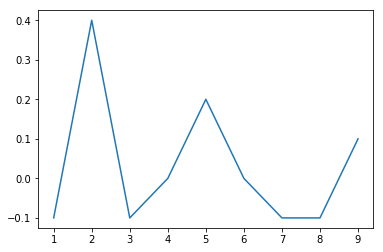

In [3]:
#Returns a number (generations) of randomly generated votes for a system of size numVotes (default is 9)
def randomVotes(generations, numVotes=9):
    return np.random.randint(-1, 2, size=(numVotes,generations))

gens = 10

u = np.zeros((gens,9))
v = randomVotes(gens)
x = np.linspace(1,9,9)
y = np.linspace(1,gens,gens)
# X,Y = np.meshgrid(x,y)

# plt.figure(dpi=150)
# plt.quiver(X,Y, u, v, scale=4.5*gens, )
# plt.xlim([0.25,9.5])
# plt.ylim([0.25,gens+0.5])
# plt.xlabel("Justice")
# plt.ylabel("Case")
# plt.xticks(np.linspace(1,9,9))
# plt.yticks(np.linspace(1,gens,gens))

# plt.show()

m = np.mean(v, axis=1)

plt.plot(x, m)
plt.show()

ValueError: invalid literal for int() with base 10: '\ufeffcasId'

In [11]:
casestr = "1994-053"
caseIDint = int(casestr[0:4] + casestr[5:])
print(caseIDint)

1994053


In [7]:
arrAll = np.array([[]])
arr = np.array([1,2,3])
arr2 = np.array([4,5,6])
arrAll = np.append(arrAll, arr)
arrAll = np.append(arrAll, arr2)
print(arrAll)

AxisError: axis 1 is out of bounds for array of dimension 1

In [4]:
a = np.array([])
for i in range(9): a = np.append(a,0)

d = np.array([])
for i in range(9): d = np.append(d,1)

b = np.array([None,None,None,None,None,None,None,None,None])

b = np.vstack([b,a])
print(b)
b = np.vstack([b,d])
print(b)

[[None None None None None None None None None]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]
[[None None None None None None None None None]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]]
